In [1]:
import warnings
#warnings.filterwarnings("error")
import sys
sys.path.append('pysubgroup')
import numpy as np

In [2]:
from model_mining.CreateDataSets import *

In [3]:
#generate_two_dataframes(background_sizes, n_classes, num_noise_attributes, generate_regression_dataframe, generate_all_regression_parameters)

In [4]:
import pysubgroup as ps
import matplotlib.pyplot as plt

In [5]:
from model_mining.model_target import *
from tqdm.notebook import tqdm

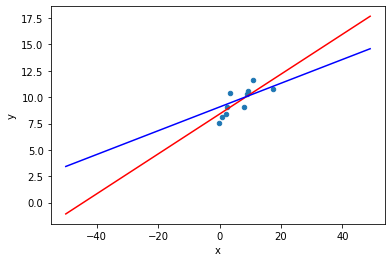

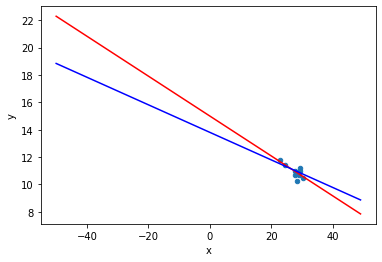

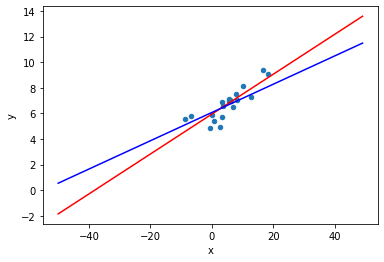

In [18]:
model=PolyRegression_ModelClass()

index=1

x=np.arange(-50,50)
all_betas=[]
ns=range(10,100,10)
for i,num_points in tqdm(enumerate(ns)):
    betas=[]
    for _ in range(1000):
        
        while True:
            parameters=generate_all_regression_parameters(1)
            para=parameters[index]
            if abs(para.slope) > 0.1 and abs(para.y0-para.x0*para.slope) > 1:
                break
        beta_0=np.array([para.slope, para.y0-para.x0*para.slope])
        df=generateDataFrameForLinesByInjection_uncorrelated([num_points], [para])
        #ax=df.plot.scatter('x','y')
        model.calculate_constant_statistics(ps.SubgroupDiscoveryTask(df,None,None,None))
        fitted=model.fit(np.ones(len(df),dtype=bool))
        #ax.plot(x,np.polyval(fitted.beta, x),color='r')
        #print(fitted.beta)
        betas.append(abs((fitted.beta-beta_0)/beta_0))
        if abs((fitted.beta-beta_0)/beta_0)[0] > 0.4:
            ax=df.plot.scatter('x','y')
            ax.plot(x,np.polyval(fitted.beta, x),color='r')
            ax.plot(x,np.polyval(beta_0, x),color='b')
    all_betas.append(np.abs(np.array(betas)))

In [19]:
def plot_relative_convergence(index):
    means=[]
    stds=[]
    
    for betas in all_betas:
        means.append(np.mean(betas[:,index]))
        stds.append(np.std(betas[:,index]))
    plt.errorbar(ns,means,yerr=stds)

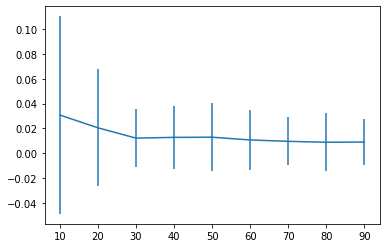

In [20]:
plot_relative_convergence(1)

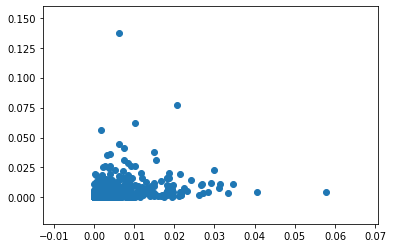

In [9]:
plt.scatter(all_betas[4][:,0],all_betas[4][:,1])

In [10]:
np.all(all_betas[0]>0)

True